In [1]:
import numpy as np
import fnv
import fnv.file
import fnv.reduce
import cv2

## Setting constants

In [2]:
video_path = "C:\\Users\\U361220\\Desktop\\SEQ Conversion\\Videos\\TermovisionDamage3.seq"
output_folder = "C:\\Users\\U361220\\Desktop\\SEQ Conversion\\Damage3\\Normal Frames\\No Concatenation"
im = fnv.file.ImagerFile(video_path) 
im.unit = fnv.Unit.COUNTS
scale = np.uint16

## Extracting frames

In [31]:
for i in im.num_frames:
    # Populate im.final with frame data
    im.get_frame(i)  
    
    # Get items for scaling
    im_min = min(im.final)
    im_max = max(im.final)
    im_range = im_max - im_min
    
    # Reshape and scale the frame for jpeg
    frame_unscaled = np.array(im.final, copy=False).reshape((im.height, im.width))
    frame = (((frame_unscaled - im_min) / im_range) * 255).astype(scale)
    

## Viewing the frame

In [46]:
im.get_frame(500)
final = np.array(im.final, copy=False).reshape((im.height, im.width))
frame_8bit = (final/256).astype(np.uint8)
print(final)

[[12076 12083 12079 ... 11859 11866 11824]
 [12105 12085 12088 ... 11845 11872 11861]
 [12110 12100 12088 ... 11886 11861 11864]
 ...
 [12809 12831 12834 ... 12631 12644 12632]
 [12835 12832 12811 ... 12646 12635 12639]
 [12828 12829 12829 ... 12661 12671 12642]]


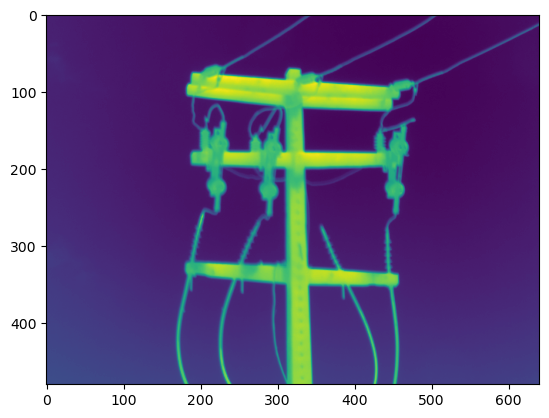

: 

In [53]:
# ndarray = np.full((300,300,3), 125, dtype=np.uint8)
 
#show image
from matplotlib import pyplot as plt

#Import image
# image = cv2.imread("input_path")

#Show the image with matplotlib
plt.imshow(final)
plt.show()

In [51]:
# cv2.imwrite('.\image.jpeg', frame_8bit)

True

## Viewing the superframe

In [44]:

im.get_superframe(1)
final = np.array(im.final, copy=False).reshape((im.height, im.width))
print(final)

[[12076 12083 12079 ... 11859 11866 11824]
 [12105 12085 12088 ... 11845 11872 11861]
 [12110 12100 12088 ... 11886 11861 11864]
 ...
 [12809 12831 12834 ... 12631 12644 12632]
 [12835 12832 12811 ... 12646 12635 12639]
 [12828 12829 12829 ... 12661 12671 12642]]


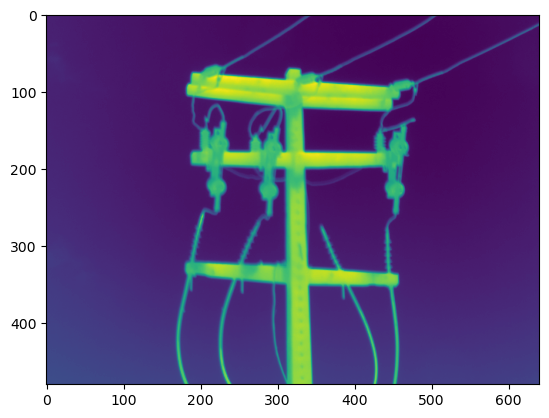

In [45]:
plt.imshow(final)
plt.show()

## Viewing frame's metadata

In [35]:
for f in im.frame_info:
    print(f)

{'name': 'Time', 'value': '313:16:31:15.500000', 'unit': 'IRIG', 'type': 'ascii'}
{'name': 'FrameNumber', 'value': '63850', 'unit': '', 'type': 'int'}
{'name': 'Preset', 'value': '0', 'unit': '', 'type': 'int'}
{'name': 'TimeSource', 'value': 'Unknown', 'unit': '', 'type': 'ascii'}
{'name': 'Mark', 'value': 'F', 'unit': '', 'type': 'bool'}
{'name': 'MarkStart', 'value': 'F', 'unit': '', 'type': 'bool'}
{'name': 'MarkStop', 'value': 'F', 'unit': '', 'type': 'bool'}


## Image reader metadata

In [36]:
print(im.data_type)
print(im.base_unit)
print(im.base_temp_type)
print(im.supported_units)

DataType.UINT16
Unit.COUNTS
TempType.CELSIUS
[<Unit.COUNTS: 0>, <Unit.RADIANCE_FACTORY: 4>, <Unit.OBJECT_SIGNAL: 3>, <Unit.TEMPERATURE_FACTORY: 5>]


## Attempting extraction to different file format (fails)

In [37]:
# Set the options for file export
options = fnv.file.ImagerFileExtractOptions()
options.start_frame = 0
options.end_frame = im.num_frames - 1
options.preferredFormat = 'mp4'

# Export the file
im.extract(f'{output_folder}\\extracted.mp4', options)

False